<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-103-mna/blob/main/Limpieza%2C_an%C3%A1lisis%2C_visualizaci%C3%B3n_y_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Limpieza, análisis, visualización y kmeans P1**
## **Maestría:** Inteligencia Artificial Aplicada
## **Alumnos:** Alejandra Ramírez Romano A01793144 y Sergio López Madriz A01064725
## **Fecha de entrega:**  15 de Noviembre de 2022

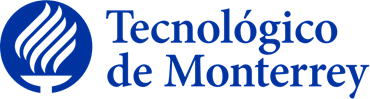


#1.Limpieza y análisis de Datos

Importamos las librerias a utilizar.

In [210]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [211]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 
import seaborn as sns  
from tqdm import tqdm
%matplotlib inline
from sklearn.cluster import KMeans
import geopandas
import geopandas as gpd
from shapely.geometry import Point
import qeds
qeds.themes.mpl_style();

Configuramos Pandas para que muestre todas las columnas.

In [212]:
pd.set_option("display.max_columns", None)

Cargamos el archivo de Aguas Superficiales

In [213]:
files.upload()

Saving Aguas_Superficiales.csv to Aguas_Superficiales (7).csv


{'Aguas_Superficiales.csv': b'CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO\r\nDLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.2473,2020,6,Buena calidad,54.08,C

In [214]:
Data_Aguas_Sup =  pd.read_csv("Aguas_Superficiales.csv" , encoding="cp1252")


Ingresamos la data a un dataframe

In [215]:
dfAguas= pd.DataFrame(Data_Aguas_Sup)
dfAguas.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [216]:
dfAguas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   int64  
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

La base de datos tiene un total de 3,493 lineas, y 4 columnas con información nula que más adelante eliminaremos.

La columna 44 contiene nuestra variable de salida (dependiente)  que es el semaforo indicando si la calidad del agua buena (verde), mala (rojo) o regular (amarillo).   

In [217]:
dfAguas['SEMAFORO'].value_counts()

Verde       1267
Amarillo    1135
Rojo        1091
Name: SEMAFORO, dtype: int64

In [218]:
dfAguas['SEMAFORO'].value_counts()/dfAguas['SEMAFORO'].shape

Verde       0.362725
Amarillo    0.324936
Rojo        0.312339
Name: SEMAFORO, dtype: float64

En general se encuentran balanceadas las clases, por lo tanto no es necesario ocupar técinas de balanceo (SMOTE + Random Under Sampling,SMOTE + Tomek Links,SMOTE + ENN )

In [219]:
dfAguas.isnull().any()

CLAVE                     False
SITIO                     False
ORGANISMO_DE_CUENCA       False
ESTADO                    False
MUNICIPIO                 False
CUENCA                     True
CUERPO DE AGUA             True
TIPO                      False
SUBTIPO                    True
LONGITUD                  False
LATITUD                   False
PERIODO                   False
DBO_mg/L                   True
CALIDAD_DBO                True
DQO_mg/L                   True
CALIDAD_DQO                True
SST_mg/L                   True
CALIDAD_SST                True
COLI_FEC_NMP_100mL         True
CALIDAD_COLI_FEC           True
E_COLI_NMP_100mL           True
CALIDAD_E_COLI             True
ENTEROC_NMP_100mL          True
CALIDAD_ENTEROC            True
OD_PORC                    True
CALIDAD_OD_PORC            True
OD_PORC_SUP                True
CALIDAD_OD_PORC_SUP        True
OD_PORC_MED                True
CALIDAD_OD_PORC_MED        True
OD_PORC_FON                True
CALIDAD_

In [220]:
dfAguas.isnull().sum()

CLAVE                        0
SITIO                        0
ORGANISMO_DE_CUENCA          0
ESTADO                       0
MUNICIPIO                    0
CUENCA                       1
CUERPO DE AGUA              14
TIPO                         0
SUBTIPO                     14
LONGITUD                     0
LATITUD                      0
PERIODO                      0
DBO_mg/L                   912
CALIDAD_DBO                912
DQO_mg/L                   912
CALIDAD_DQO                912
SST_mg/L                     4
CALIDAD_SST                  4
COLI_FEC_NMP_100mL         911
CALIDAD_COLI_FEC           911
E_COLI_NMP_100mL           911
CALIDAD_E_COLI             911
ENTEROC_NMP_100mL         2589
CALIDAD_ENTEROC           2589
OD_PORC                   1696
CALIDAD_OD_PORC           1696
OD_PORC_SUP               1874
CALIDAD_OD_PORC_SUP       1874
OD_PORC_MED               3006
CALIDAD_OD_PORC_MED       3006
OD_PORC_FON               2547
CALIDAD_OD_PORC_FON       2547
TOX_D_48


 Procedemos a eliminar las siguientes columnas dado que no contienen información:
 
 38  TOX_D_48_FON_UT         0 non-null      float64

 39  CALIDAD_TOX_D_48_FON    0 non-null      float64
 
 42  TOX_FIS_FON_15_UT       0 non-null      float64
 
 43  CALIDAD_TOX_FIS_FON_15  0 non-null      float64

In [221]:
dfAguas.drop(['TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON','TOX_FIS_FON_15_UT','CALIDAD_TOX_FIS_FON_15'], axis=1, inplace=True)
dfAguas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,OCRBR5206M1,RIO SALADO PUENTE CARRETERO,RIO BRAVO,TAMAULIPAS,GUERRERO,RIO BRAVO 11,RIO SALADO,LOTICO,RIO,-99.42142,26.78971,2020,<2,Excelente,<10,Excelente,122,Aceptable,2400,Contaminada,2400,Fuertemente contaminada,NaN,NaN,69.1,Buena calidad,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,Amarillo,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,LOTICO
3489,OCRBR5207M1,EL LAGUITO,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 11,EL LAGUITO,LENTICO,LAGO,-99.53064,27.43714,2020,39.09,Contaminada,115.88,Contaminada,54,Buena calidad,2400,Contaminada,4,Excelente,NaN,NaN,NaN,NaN,91.6,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,Rojo,"DBO,DQO,CF,",NO,NO,SI,NO,SI,ND,SI,SI,LENTICO
3490,OCRBR5208M1,PUENTE INTERNACIONAL I NUEVO LAREDO,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 11,RIO BRAVO,LOTICO,RIO,-99.50727,27.49901,2020,4.4,Buena calidad,87.64,Contaminada,70,Buena calidad,240,Aceptable,15,Excelente,NaN,NaN,78.8,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,Rojo,"DQO,",SI,NO,SI,SI,SI,ND,SI,SI,LOTICO
3491,OCRBR5209M1,RIO BRAVO FRENTE A COMAPA,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 10,RIO BRAVO,LOTICO,RIO,-99.52221,27.49631,2020,<2,Excelente,35.92,Aceptable,56,Buena calidad,2400,Contaminada,11,Excelente,NaN,NaN,76.2,Excelente,NaN,NaN,NaN,

In [222]:
dfAguas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   int64  
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

Estandarizamos los valores faltantes para poder sustituirlos usando np.nan

In [223]:
dfAguas = dfAguas.replace(['NO DATA','N/A', 0, ''],np.nan)
dfAguas.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


Identificamos las variables (columnas) con más datos vacios.

In [224]:
percent_missing = dfAguas.isnull().sum() * 100 / len(dfAguas)
percent_missing.sort_values(ascending=False)

CALIDAD_OD_PORC_MED       86.057830
OD_PORC_MED               86.057830
CALIDAD TOX_D_48_SUP      78.184941
TOX_D_48_SUP_UT           78.184941
ENTEROC_NMP_100mL         74.119668
CALIDAD_ENTEROC           74.119668
CALIDAD_OD_PORC_FON       72.917263
OD_PORC_FON               72.917263
CALIDAD_OD_PORC_SUP       53.650157
OD_PORC_SUP               53.650157
CALIDAD_TOX_FIS_SUP_15    52.075580
TOX_FIS_SUP_15_UT         52.075580
OD_PORC                   48.554251
CALIDAD_OD_PORC           48.554251
CALIDAD_TOX_D_48          48.010306
TOX_D_48_UT               48.010306
CALIDAD_TOX_V_15          47.924420
TOX_V_15_UT               47.924420
CONTAMINANTES             36.272545
DQO_mg/L                  26.109362
DBO_mg/L                  26.109362
CALIDAD_DQO               26.109362
CALIDAD_DBO               26.109362
E_COLI_NMP_100mL          26.080733
CALIDAD_E_COLI            26.080733
CALIDAD_COLI_FEC          26.080733
COLI_FEC_NMP_100mL        26.080733
SUBTIPO                    0

Hacemos el reemplazo de valores con signos < menor que por numeros para poder analizar correlaciones entre las variables

In [225]:
replacement_mapping_dict = {
    "<1": "0.99",
    "<10": "9.99",
    "<3": "2.99",
    "<2": "1.99",
}
dfAguas.replace(replacement_mapping_dict, inplace = True)

Hacemos el cambio de Objeto a Float64 ya que contine decimales.

In [226]:
dfAguas["PERIODO"] = dfAguas["PERIODO"].astype("category")
dfAguas["DBO_mg/L"] = dfAguas["DBO_mg/L"].astype("float64")
dfAguas["DQO_mg/L"] = dfAguas["DQO_mg/L"].astype("float64")
dfAguas["SST_mg/L"] = dfAguas["SST_mg/L"].astype("float64")
dfAguas["COLI_FEC_NMP_100mL"] = dfAguas["COLI_FEC_NMP_100mL"].astype("float64")
dfAguas["E_COLI_NMP_100mL"] = dfAguas["E_COLI_NMP_100mL"].astype("float64")
dfAguas["ENTEROC_NMP_100mL"] = dfAguas["ENTEROC_NMP_100mL"].astype("float64")
dfAguas["OD_PORC"] = dfAguas["OD_PORC"].astype("float64")
dfAguas["OD_PORC_SUP"] = dfAguas["OD_PORC_SUP"].astype("float64")
dfAguas["OD_PORC_MED"] = dfAguas["OD_PORC_MED"].astype("float64")
dfAguas["OD_PORC_FON"] = dfAguas["OD_PORC_FON"].astype("float64")
dfAguas["TOX_D_48_UT"] = dfAguas["TOX_D_48_UT"].astype("float64")
dfAguas["TOX_V_15_UT"] = dfAguas["TOX_V_15_UT"].astype("float64")
dfAguas["TOX_D_48_SUP_UT"] = dfAguas["TOX_D_48_SUP_UT"].astype("float64")
dfAguas["TOX_FIS_SUP_15_UT"] = dfAguas["TOX_FIS_SUP_15_UT"].astype("float64")
dfAguas.dtypes

CLAVE                       object
SITIO                       object
ORGANISMO_DE_CUENCA         object
ESTADO                      object
MUNICIPIO                   object
CUENCA                      object
CUERPO DE AGUA              object
TIPO                        object
SUBTIPO                     object
LONGITUD                   float64
LATITUD                    float64
PERIODO                   category
DBO_mg/L                   float64
CALIDAD_DBO                 object
DQO_mg/L                   float64
CALIDAD_DQO                 object
SST_mg/L                   float64
CALIDAD_SST                 object
COLI_FEC_NMP_100mL         float64
CALIDAD_COLI_FEC            object
E_COLI_NMP_100mL           float64
CALIDAD_E_COLI              object
ENTEROC_NMP_100mL          float64
CALIDAD_ENTEROC             object
OD_PORC                    float64
CALIDAD_OD_PORC             object
OD_PORC_SUP                float64
CALIDAD_OD_PORC_SUP         object
OD_PORC_MED         

Realizamos la correlación de las variables

In [227]:
dfAguas.corr()

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
LONGITUD,1.000000,-0.713966,-0.006401,-0.016571,0.000128,-0.024168,-0.021451,-0.024985,-0.200221,-0.198441,-0.294739,-0.172486,-0.052448,0.024019,0.095507,0.028271
LATITUD,-0.713966,1.000000,-0.023889,-0.027822,-0.046190,0.006086,0.005413,-0.086075,0.289978,0.238192,0.203858,0.241960,0.048028,-0.035083,-0.062281,-0.024561
DBO_mg/L,-0.006401,-0.023889,1.000000,0.883694,0.058846,0.614788,0.589750,NaN,-0.319284,-0.047934,-0.249785,-0.175372,0.225671,0.581577,-0.011434,0.097780
DQO_mg/L,-0.016571,-0.027822,0.883694,1.000000,0.112727,0.581172,0.590654,NaN,-0.360387,-0.001247,-0.165756,-0.129900,0.295170,0.552060,-0.013164,0.115777
SST_mg/L,0.000128,-0.046190,0.058846,0.112727,1.000000,0.032162,0.031172,0.088236,-0.009243,0.086860,0.059363,0.031454,0.029478,0.018918,-0.005785,0.050226
COLI_FEC_NMP_100mL,-0.024168,0.006086,0.614788,0.581172,0.032162,1.000000,0.932082,NaN,-0.146827,-0.022994,0.015537,0.014824,0.131723,0.346344,-0.010922,-0.012721
E_COLI_NMP_100mL,-0.021451,0.005413,0.589750,0.590654,0.031172,0.932082,1.000000,NaN,-0.141548,-0.104008,-0.042261,-0.077683,0.118830,0.379981,-0.006944,-0.003858
ENTEROC_NMP_100mL,-0.024985,-0.086075,NaN,NaN,0.088236,NaN,NaN,1.000000,NaN,-0.086885,-0.003523,-0.004124,NaN,NaN,NaN,-0.005368
OD_PORC,-0.200221,0.289978,-0.319284,-0.360387,-0.009243,-0.146827,-0.141548,NaN,1.000000,NaN,NaN,NaN,-0.178684,-0.200067,NaN,NaN
OD_PORC_SUP,-0.198441,0.238192,-0.047934,-0.001247,0.086860,-0.022994,-0.104008,-0.086885,NaN,1.000000,0.614000,0.522645,NaN,NaN,-0.048458,0.011086


A través de un heatmap realizamos la visualización de las variables que más correlación fuerte tienen >0.6.

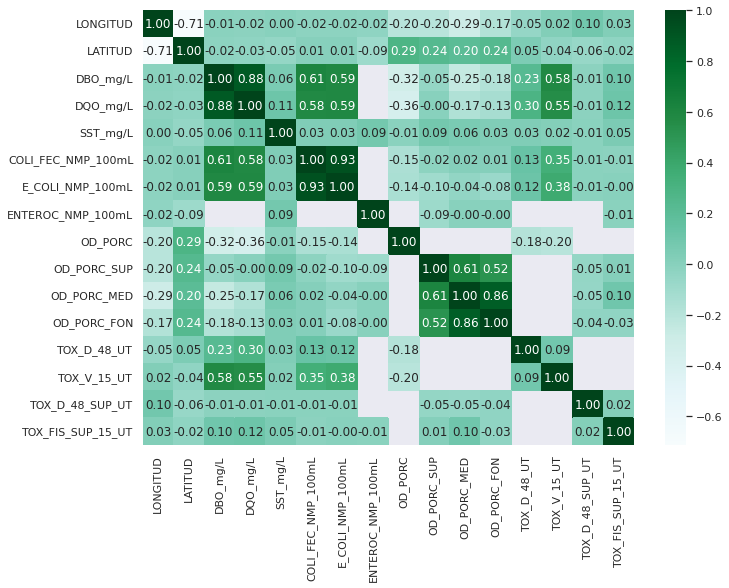

In [228]:
sns.set(rc={'figure.figsize':(11,8)}) 
Correlacion= dfAguas.corr(method='pearson')
sns.heatmap(Correlacion, cmap='BuGn',annot= True, fmt='.2f')
plt.show()

Realizamos la tabla estadistica para visualizar medias, quartiles, max, min, etc.

In [229]:
dfAguas.describe(include='all')

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
count,3493,3493,3493,3493,3493,3492,3479,3493,3479,3493.000000,3493.000000,3493.0,2581.000000,2581,2581.000000,2581,3489.000000,3489,2.582000e+03,2582,2.582000e+03,2582,904.000000,904,1797.000000,1797,1619.000000,1619,487.000000,487,946.000000,946,1816.000000,1816,1819.000000,1819,762.000000,762,1674.000000,1674,3493,2226,3493,3493,3493,3493,3493,3493,3493,3493,3493
unique,3493,3481,13,32,755,521,1067,23,27,NaN,NaN,1.0,NaN,5,NaN,5,NaN,5,NaN,5,NaN,5,NaN,4,NaN,5,NaN,5,NaN,5,NaN,5,NaN,4,NaN,4,NaN,4,NaN,4,3,96,3,3,3,3,3,3,3,2,3
top,DLAGU8,ANTES DE LA CONFLUENCIA CON EL RIO ATOYAC,LERMA SANTIAGO PACIFICO,VERACRUZ DE IGNACIO DE LA LLAVE,ACAPULCO DE JUAREZ,YUCATAN (RESTO DE RH 32),OCEANO PACIFICO,LOTICO,RIO,NaN,NaN,2020.0,NaN,Excelente,NaN,Contaminada,NaN,Excelente,NaN,Fuertemente contaminada,NaN,Fuertemente contaminada,NaN,Excelente,NaN,Excelente,NaN,Excelente,NaN,Excelente,NaN,Excelente,NaN,No Toxico,NaN,No Toxico,NaN,No Toxico,NaN,No Toxico,Verde,"CF,E_COLI,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO
freq,1,3,709,326,60,101,139,1263,1478,NaN,NaN,3493.0,NaN,1330,NaN,790,NaN,1780,NaN,891,NaN,1054,NaN,709,NaN,769,NaN,853,NaN,236,NaN,409,NaN,1729,NaN,1671,NaN,738,NaN,1657,1267,439,2319,1650,3104,1634,1453,2589,2958,3411,1772
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.359969,21.046992,NaN,16.881738,NaN,64.330819,NaN,102.145622,NaN,9.568881e+04,NaN,7.933769e+04,NaN,1086.704712,NaN,66.839677,NaN,81.459883,NaN,71.590678,NaN,66.868869,NaN,1.052101,NaN,1.786478,NaN,1.044961,NaN,1.014994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.122773,3.893696,NaN,65.141353,NaN,149.828844,NaN,441.860927,NaN,1.168887e+06,NaN,1.051334e+06,NaN,4305.914620,NaN,31.418262,NaN,28.562522,NaN,26.370775,NaN,28.197855,NaN,0.653254,NaN,6.327975,NaN,0.868180,NaN,0.320605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-117.124030,14.534910,NaN,1.990000,NaN,9.990000,NaN,9.990000,NaN,2.990000e+00,NaN,2.990000e+00,NaN,2.990000,NaN,9.990000,NaN,9.990000,NaN,9.990000,NaN,9.990000,NaN,0.990000,NaN,0.990000,NaN,0.990000,NaN,0.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-103.882310,18.396070,NaN,1.990000,NaN,11.870000,NaN,9.990000,NaN,3.420000e+02,NaN,4.000000e+01,NaN,2.990000,NaN,44.300000,NaN,61.200000,NaN,52.400000,NaN,47.325000,NaN,0.990000,NaN,0.990000,NaN,0.990000,NaN,0.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.795530,20.148980,NaN,2.630000,NaN,27.010000,NaN,24.300000,NaN,2.400000e+03,NaN,4.240000e+02,NaN,2.990000,NaN,68.300000,NaN,84.100000,NaN,72.400000,NaN,67.500000,NaN,0.990000,NaN,0.990000,NaN,0.990000,NaN,0.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.860230,22.828930,NaN,10.000000,NaN,57.000000,NaN,57.000000,NaN,2.400000e+04,NaN,6.488000e+03,NaN,63.000000,NaN,91.600000,NaN,99.950000,NaN,91.500000,NaN,88.875000,NaN,0.990000,NaN,0.990000,NaN,0.990000,NaN,0.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#2.K-means

Agregamos una columna con el cruce de coordenadas.

In [230]:
dfAguas["Coordinates"] = list(zip(dfAguas.LONGITUD, dfAguas.LATITUD))
dfAguas["Coordinates"] = dfAguas["Coordinates"].apply(Point)


In [231]:
gdfAguas = gpd.GeoDataFrame(dfAguas, geometry="Coordinates")
gdfAguas.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,Coordinates
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020,6.0,Buena calidad,54.08,Contaminada,13.7500,Excelente,1162.0,Contaminada,98.0,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,No Toxico,0.99,No Toxico,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO,POINT (-102.33911 22.24730)
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020,NaN,NaN,NaN,NaN,9.9900,Excelente,NaN,NaN,NaN,NaN,20.00,Excelente,NaN,NaN,92.0,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,0.99,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.84290 22.90473)
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020,NaN,NaN,NaN,NaN,9.9900,Excelente,NaN,NaN,NaN,NaN,2.99,Excelente,NaN,NaN,92.0,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,0.99,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.86442 22.89880)
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,2.99,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,0.99,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.88604 22.89609)
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020,NaN,NaN,NaN,NaN,9.9900,Excelente,NaN,NaN,NaN,NaN,30.00,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,0.99,No Toxico,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.89657 22.87694)


Cargamos el mapa de Mexico

In [232]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [233]:
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

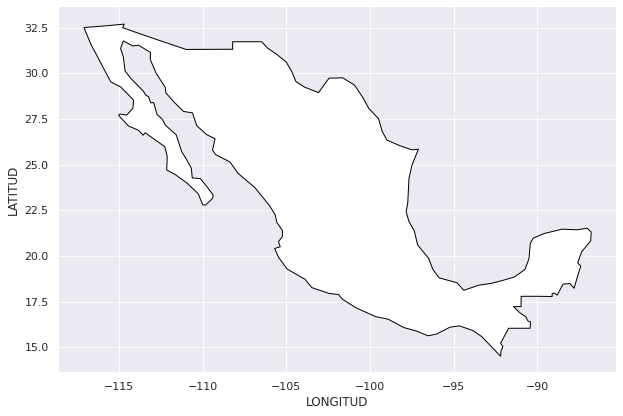

In [234]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

Graficamos todas las coordenadas de la base de datos.

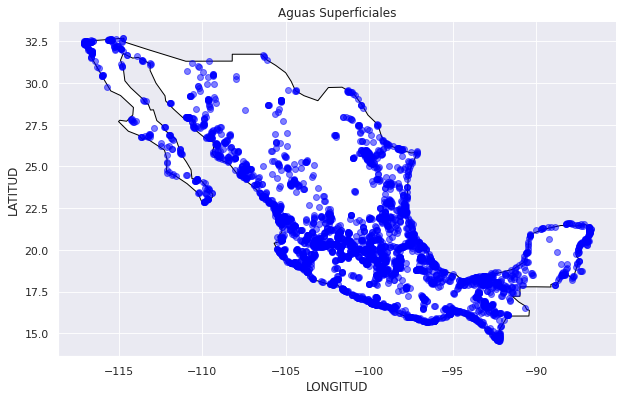

In [235]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdfAguas.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas Superficiales')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Corremos el algoritmo Kmeas para identificar el numero de clusters de las coordinadas de la base de datos.

In [236]:
columns = ['LONGITUD', 'LATITUD']
X = gdfAguas[columns]

In [237]:
Kmeanslist = []
for i in range(1, 16):
    k_means = KMeans(n_clusters=i, init='random',n_init=10, max_iter=300,tol=0.0001, random_state=0)
    k_means.fit(X)
    Kmeanslist.append(k_means.inertia_)

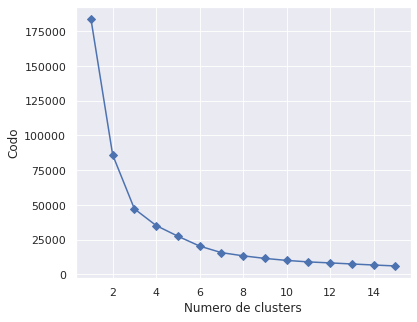

In [238]:
plt.figure(figsize=(6,5))
plt.plot(range(1, 16), Kmeanslist, marker='D')
plt.xlabel('Numero de clusters')
plt.ylabel('Codo')
plt.show()

La inflexion del codo sucede en el K-3, es por esto que se usa este como número ideal.

In [239]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
y_hat = kmeans.predict(X)
y_hat

array([2, 1, 1, ..., 2, 2, 2], dtype=int32)

In [240]:
MXClusters = kmeans.cluster_centers_
print(MXClusters)

[[ -93.47131781   17.89790126]
 [-110.64834892   27.69513598]
 [-101.05200614   20.84569401]]


Ubicación de los 3 clusters de Mexico

In [241]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

i = 1
MXClusterLC = []
for cluster in MXClusters:
    latitud = round(cluster[1], 6)
    longitud = round(cluster[0], 6)
    location = geolocator.reverse(f"{latitud}, {longitud}")
    MXClusterLC.append(location)
    print(f"Localización de cluster {i} en {location}")
    i += 1 

Localización de cluster 1 en C-41, Huimanguillo, Tabasco, México
Localización de cluster 2 en México
Localización de cluster 3 en San Miguel de Allende, Guanajuato, México


In [242]:
Clusters= pd.DataFrame(MXClusters)
Clusters.rename(columns={0: "Longitud", 1: "Latitud"},inplace=True)
Clusters

,Longitud,Latitud
0,-93.471318,17.897901
1,-110.648349,27.695136
2,-101.052006,20.845694


In [243]:
gdf1 = geopandas.GeoDataFrame(
    Clusters, geometry=geopandas.points_from_xy(Clusters.Longitud, Clusters.Latitud))
gdf1

,Longitud,Latitud,geometry
0,-93.471318,17.897901,POINT (-93.47132 17.89790)
1,-110.648349,27.695136,POINT (-110.64835 27.69514)
2,-101.052006,20.845694,POINT (-101.05201 20.84569)


Graficamos los 3 clusters identificados.

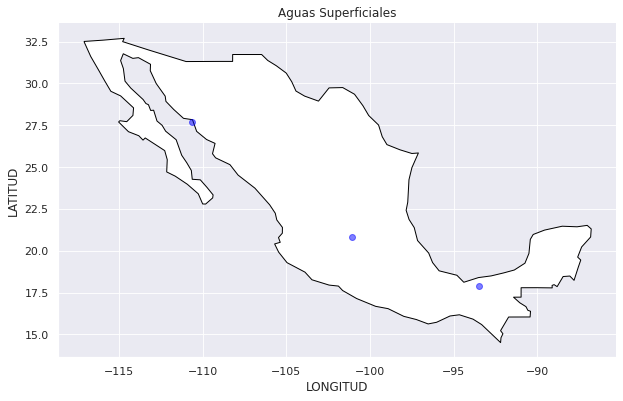

In [244]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf1.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas Superficiales')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()